<a href="https://colab.research.google.com/github/hectorcamachoz/TallerRedesNeuronales/blob/main/TallerRedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller Redes Neuronales

El objetivo es realizar una red neuronal que detecte un numero en imagenes.

**1.** Importare las librerias a utilizar, y la base de datos.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**2.** Mostrare el tamaño de train y test.

In [ ]:
print(f"Training images shapes: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training images shapes: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


Tenemos en train 60000 imagenes de tamaño 28x28 pixeles, y en test se tienen 10000 imagenes, de tamaño 28x28 pixeles.

**3.** A continuacion mostrare algunas imagenes de train, para revisar si se importaron de manera correcta.

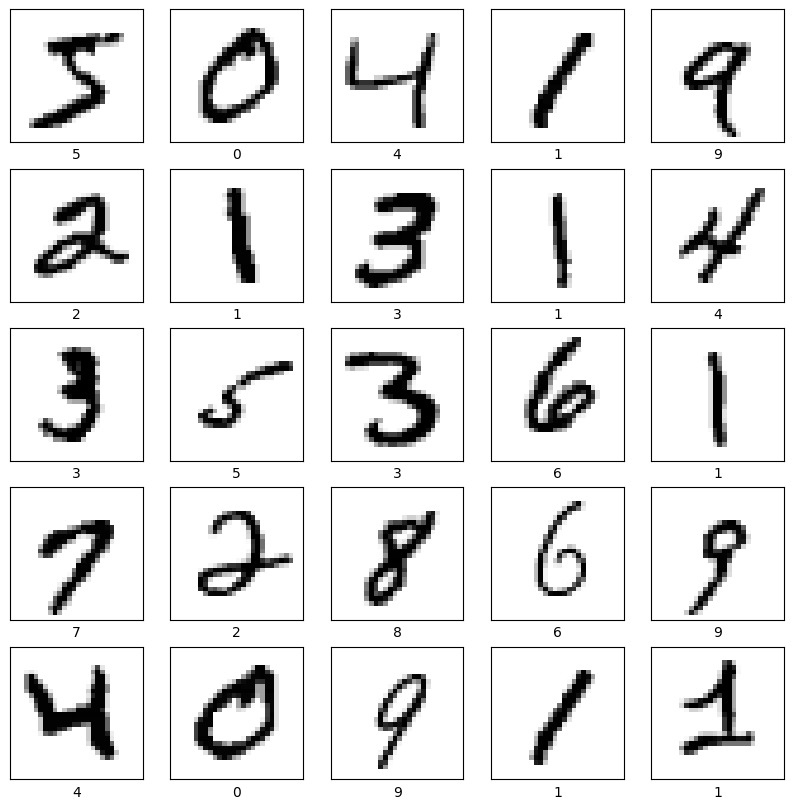

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


**4.** Revisare la proporcion de las clases en train y test.

In [ ]:
import numpy as np

unique_train, counts_train = np.unique(train_labels, return_counts=True)
proportion_train = counts_train / len(train_labels)

unique_test, counts_test = np.unique(test_labels, return_counts=True)
proportion_test = counts_test / len(test_labels)

print("Proportion of classes in training set:")
for i in range(len(unique_train)):
    print(f"Class {unique_train[i]}: {proportion_train[i]:.4f}")

print("\nProportion of classes in test set:")
for i in range(len(unique_test)):
    print(f"Class {unique_test[i]}: {proportion_test[i]:.4f}")


Proportion of classes in training set:
Class 0: 0.0987
Class 1: 0.1124
Class 2: 0.0993
Class 3: 0.1022
Class 4: 0.0974
Class 5: 0.0903
Class 6: 0.0986
Class 7: 0.1044
Class 8: 0.0975
Class 9: 0.0992

Proportion of classes in test set:
Class 0: 0.0980
Class 1: 0.1135
Class 2: 0.1032
Class 3: 0.1010
Class 4: 0.0982
Class 5: 0.0892
Class 6: 0.0958
Class 7: 0.1028
Class 8: 0.0974
Class 9: 0.1009


Se puede observar que la proporcion de las clases es aproximadamente igual en todas.

**5.** Por ultimo, en esta etapa de exploracion de datos, mostrare el valor maximo de pixel, y el minimo.

In [ ]:
print(f"Min pixel value in training set: {np.min(train_images)}")
print(f"Max pixel value in training set: {np.max(train_images)}")

Min pixel value in training set: 0
Max pixel value in training set: 255


Se puede concluir que son imagenes de 8 bits.

**6.** A continuacion se creara el modelo sequencial, y se agregara la primera capa.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
# Primera Capa, tamaño de imagen de entrada.
model.add(Flatten(input_shape=(28, 28)))

**7.** Agregare las capas ocultas, con parametros aleatorios.

In [ ]:
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,890 (956.60 KB)

 Trainable params: 244,890 (956.60 KB)

 Non-trainable params: 0 (0.00 B)

**8.** Se le agregara un EarlyStopping, para parar el entranamiento cuando ya no haya mejoras en el loss.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)


**9.** Entrenare un modelo con 50 epocas, y utilizando el callback.

In [ ]:
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    validation_split = 0.4,
                    batch_size = 32,
                    callbacks = [early_stop])

Epoch 1/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6039 - loss: 1.9605 - val_accuracy: 0.8972 - val_loss: 0.3684
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9195 - loss: 0.2898 - val_accuracy: 0.9443 - val_loss: 0.2089
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9512 - loss: 0.1807 - val_accuracy: 0.9424 - val_loss: 0.2286
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9593 - loss: 0.1447 - val_accuracy: 0.9492 - val_loss: 0.2021
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9658 - loss: 0.1217 - val_accuracy: 0.9567 - val_loss: 0.1782
Epoch 6/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9726 - loss: 0.0970 - val_accuracy: 0.9580 - val_loss: 0.1711
Epoch 7/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9730 - loss: 0.0919 - val_accuracy: 0.9640 - val_loss: 0.1435
Epoch 8/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9778 - loss: 0.0756 - 

Se entrenaron 12 epocas de 50, el mejor resultado lo presento en la epoca 7, ya que presento un val_loss de 0.1435 y un val_accuracy de 0.964


**10.** Se graficara el accuracy de entranmiento y del entrenamiento validacion.

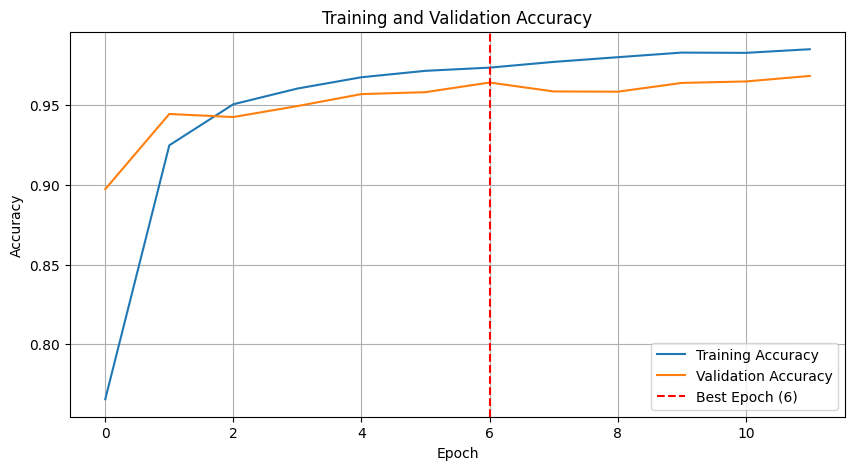

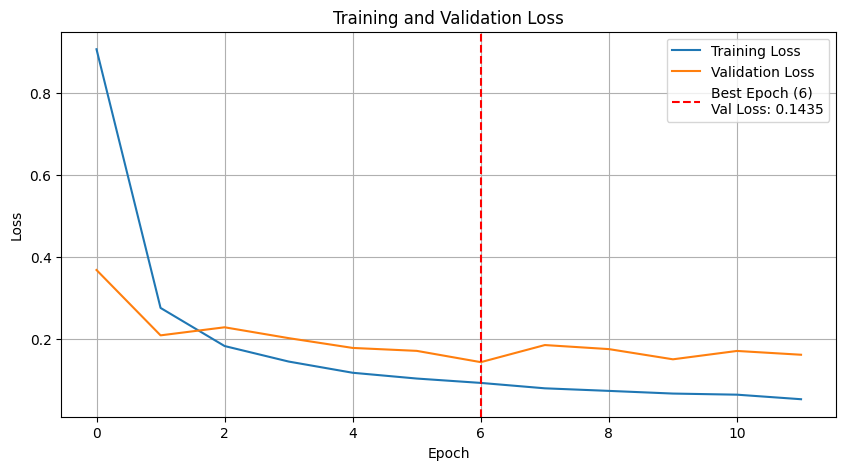

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de que el historial tiene datos válidos
val_loss_list = history.history['val_loss']

# Encontrar el índice (época) donde la val_loss fue mínima
best_epoch = np.argmin(val_loss_list)
best_val_loss = val_loss_list[best_epoch]

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Epoch ({best_epoch})')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Línea vertical en la mejor época
plt.axvline(x=best_epoch, color='r', linestyle='--',
            label=f'Best Epoch ({best_epoch})\nVal Loss: {best_val_loss:.4f}')

plt.legend(loc='upper right')
plt.grid(True)
plt.show()



In [ ]:
model.save("modelo_tallerRedesNeuronales.h5")

In [25]:
model = tf.keras.models.load_model("modelo.h5")

In [20]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
def take_photo_2(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);
             const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});
             document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();
google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise((resolve) => capture.onclick = resolve);
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename



In [36]:
take_photo_2()

<IPython.core.display.Javascript object>

'photo.jpg'

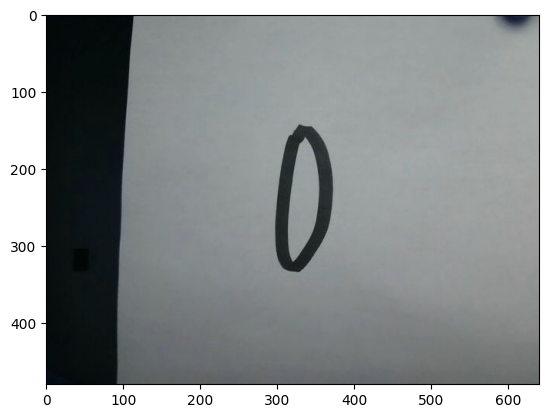

In [37]:
show_image = cv2.imread("photo.jpg")
plt.imshow(show_image)

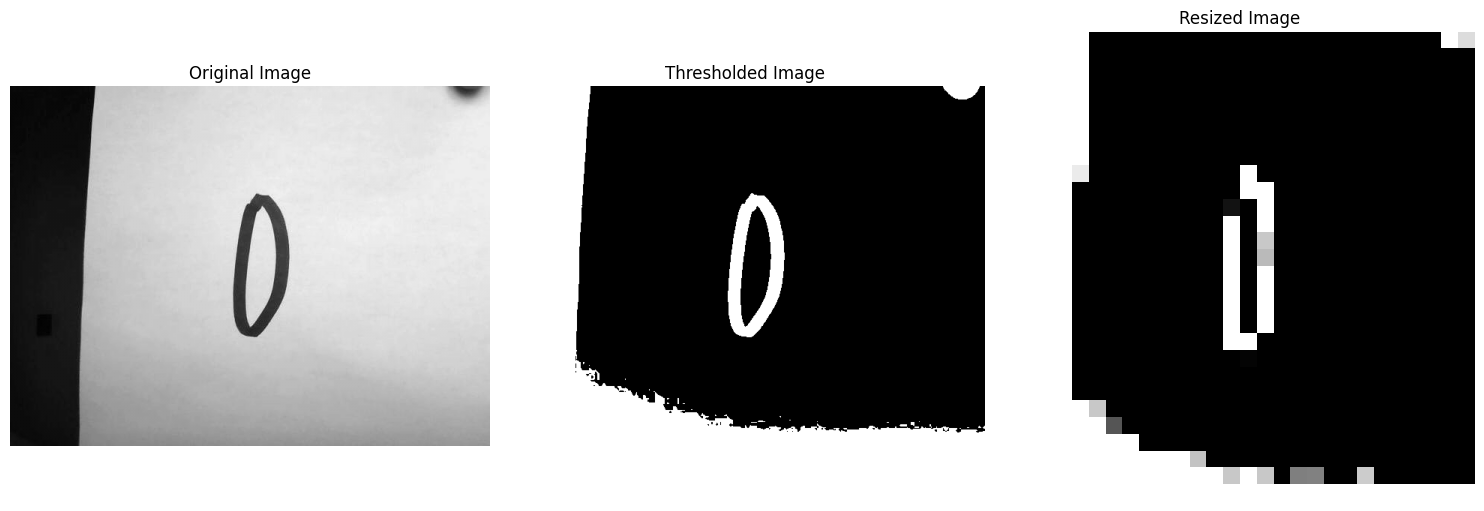

In [38]:

# Load the image
image = cv2.imread('photo.jpg', cv2.IMREAD_GRAYSCALE)

 # Thresholding
_, thresh = cv2.threshold(image,115, 255, cv2.THRESH_BINARY_INV)

 # Resize the image to 28x28 pixels
resized = cv2.resize(thresh, (28, 28))

# Display the images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
 # Original Image
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
 # Thresholded Image
axes[1].imshow(thresh, cmap='gray')
axes[1].set_title('Thresholded Image')
axes[1].axis('off')
 # Resized Image
axes[2].imshow(resized, cmap='gray')
axes[2].set_title('Resized Image')
axes[2].axis('off')
plt.tight_layout()
plt.show()


In [39]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   1.00000
  8   |   0.00000
  9   |   0.00000
The predicted digit is: 7


In [40]:
take_photo_2()

<IPython.core.display.Javascript object>

'photo.jpg'

In [53]:
def process_image(image_path):
    """
    Carga una imagen, le aplica un umbral, la redimensiona a 28x28 píxeles
    y muestra las imágenes original, con umbral y redimensionada.

    Args:
        image_path (str): La ruta al archivo de la imagen.
    """
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Thresholding
    _, thresh = cv2.threshold(image, 115, 255, cv2.THRESH_BINARY_INV)

    # Resize the image to 28x28 pixels
    resized = cv2.resize(thresh, (28, 28))

    # Display the images side by side
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    # Original Image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    # Thresholded Image
    axes[1].imshow(thresh, cmap='gray')
    axes[1].set_title('Thresholded Image')
    axes[1].axis('off')
    # Resized Image
    axes[2].imshow(resized, cmap='gray')
    axes[2].set_title('Resized Image')
    axes[2].axis('off')
    plt.tight_layout()
    plt.show()
    return resized

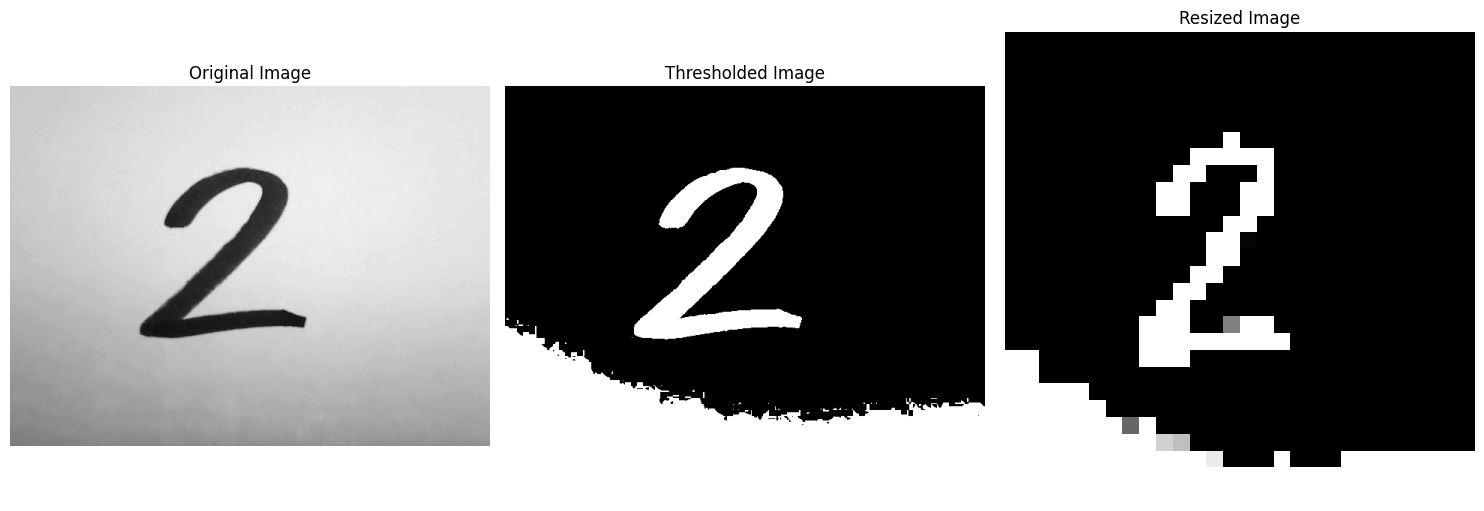

In [71]:
image_path = 'photo.jpg'
resized = process_image(image_path)

In [72]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00001
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.94540
  8   |   0.00000
  9   |   0.05459
The predicted digit is: 7


In [77]:
take_photo_2()

<IPython.core.display.Javascript object>

'photo.jpg'

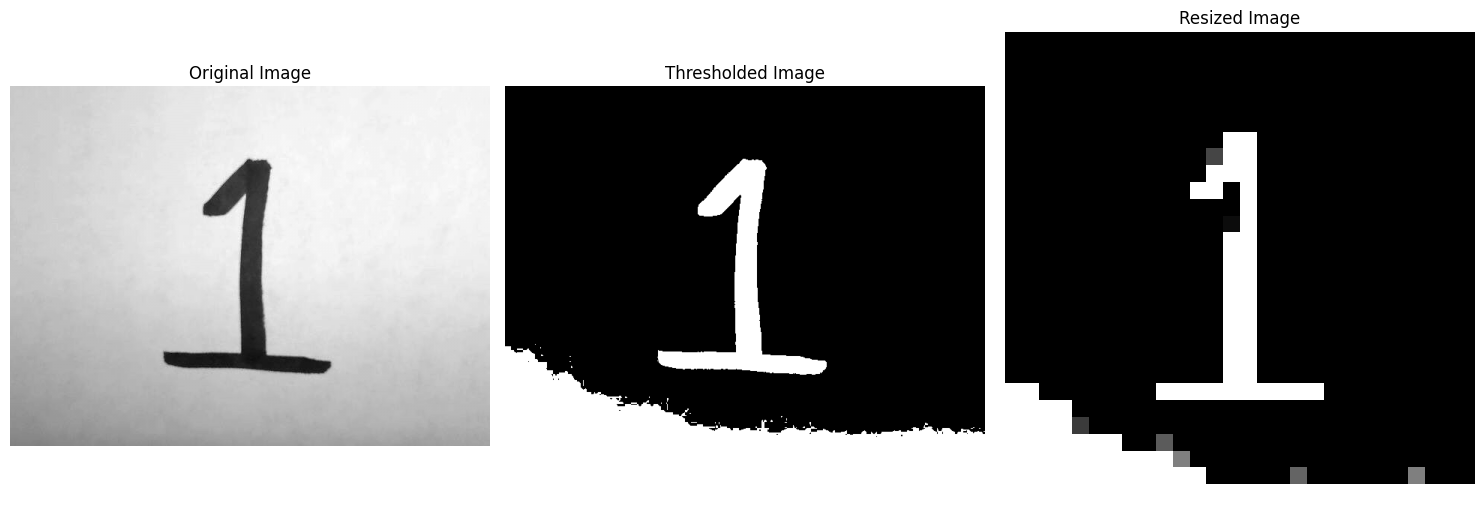

In [78]:
resized = process_image('photo.jpg')

In [80]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")
from google.colab.patches import cv2_imshow
cv2_imshow(resized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00001
  3   |   0.00053
  4   |   0.00018
  5   |   0.00000
  6   |   0.00000
  7   |   0.99588
  8   |   0.00000
  9   |   0.00340
The predicted digit is: 7


In [81]:
take_photo_2()

<IPython.core.display.Javascript object>

'photo.jpg'

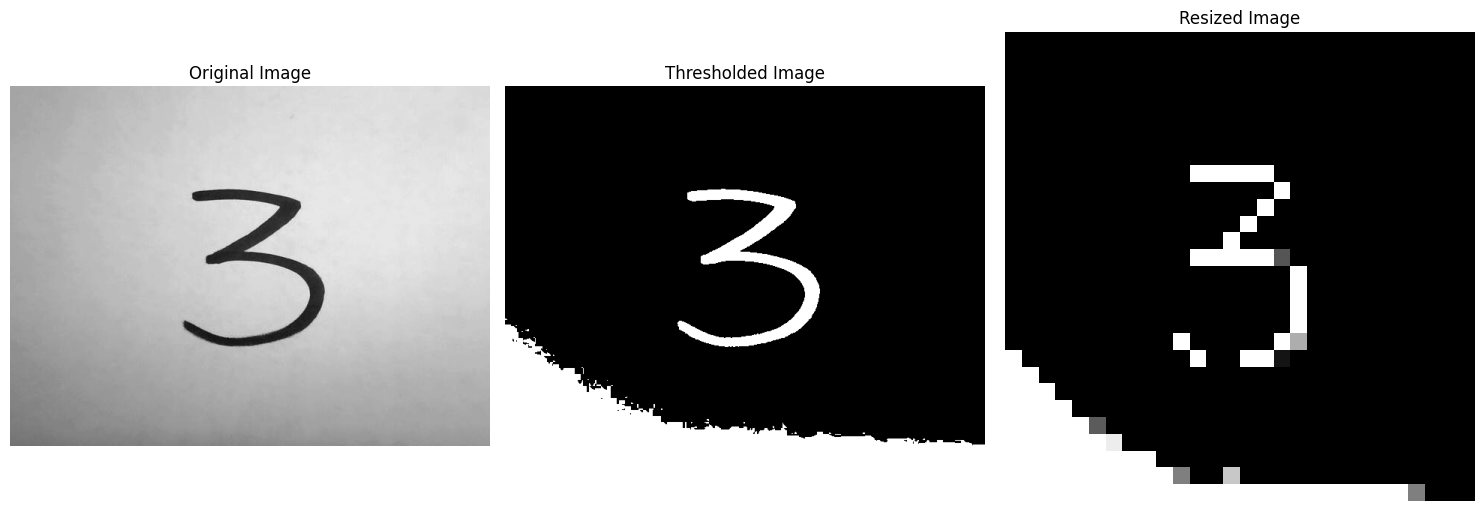

In [82]:
resized = process_image('photo.jpg')

In [83]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")
from google.colab.patches import cv2_imshow
cv2_imshow(resized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.00698
  8   |   0.00000
  9   |   0.99302
The predicted digit is: 9


In [84]:
take_photo_2()

<IPython.core.display.Javascript object>

'photo.jpg'

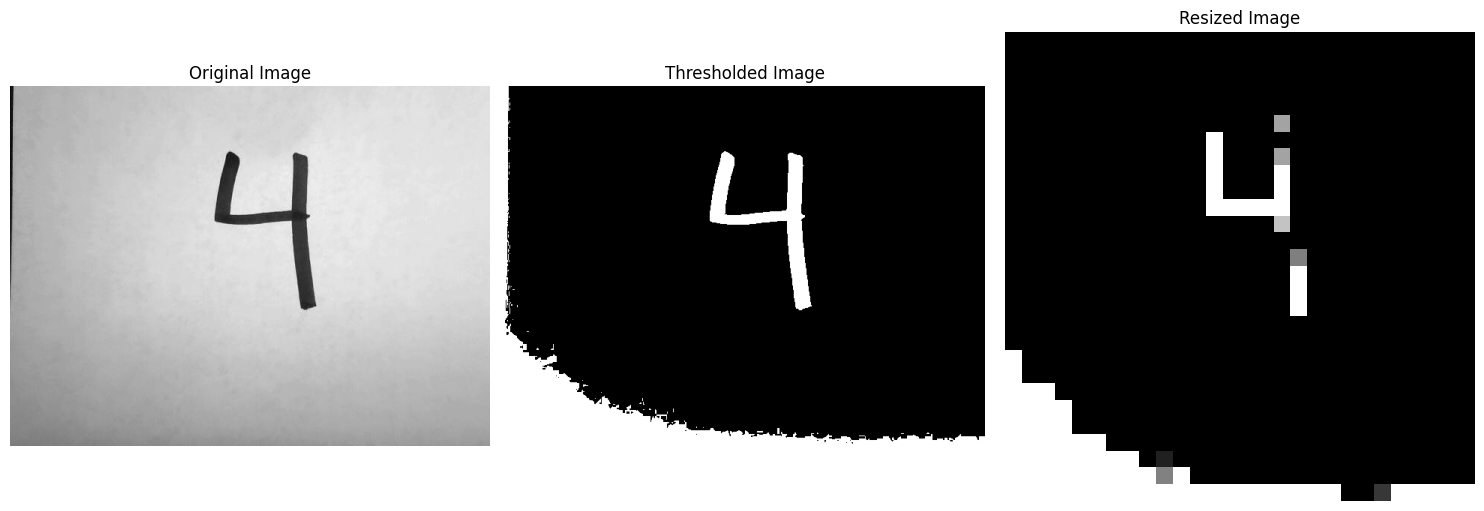

In [85]:
resized = process_image('photo.jpg')

In [86]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")
from google.colab.patches import cv2_imshow
cv2_imshow(resized)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   1.00000
  8   |   0.00000
  9   |   0.00000
The predicted digit is: 7


In [93]:
take_photo_2()


<IPython.core.display.Javascript object>

'photo.jpg'

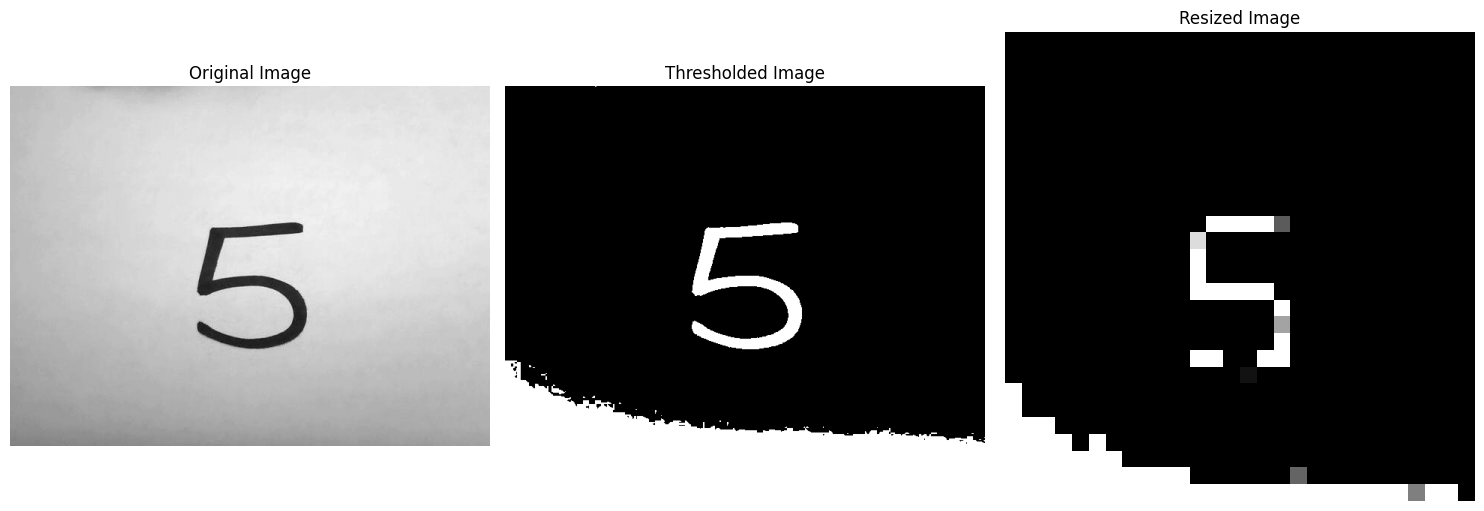

In [94]:
resized = process_image('photo.jpg')

In [95]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")
from google.colab.patches import cv2_imshow
cv2_imshow(resized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.00014
  8   |   0.00000
  9   |   0.99986
The predicted digit is: 9


In [96]:
take_photo_2()

<IPython.core.display.Javascript object>

'photo.jpg'

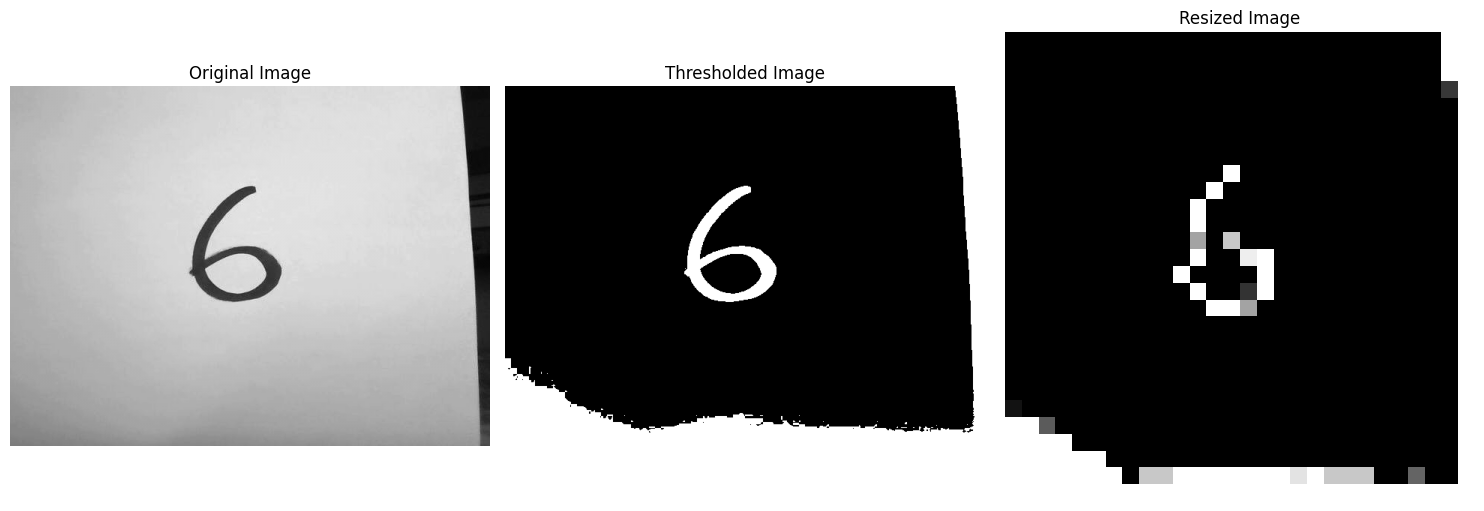

In [97]:
resized = process_image('photo.jpg')

In [98]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")
from google.colab.patches import cv2_imshow
cv2_imshow(resized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.04418
  8   |   0.00000
  9   |   0.95582
The predicted digit is: 9


In [99]:
take_photo_2()

<IPython.core.display.Javascript object>

'photo.jpg'

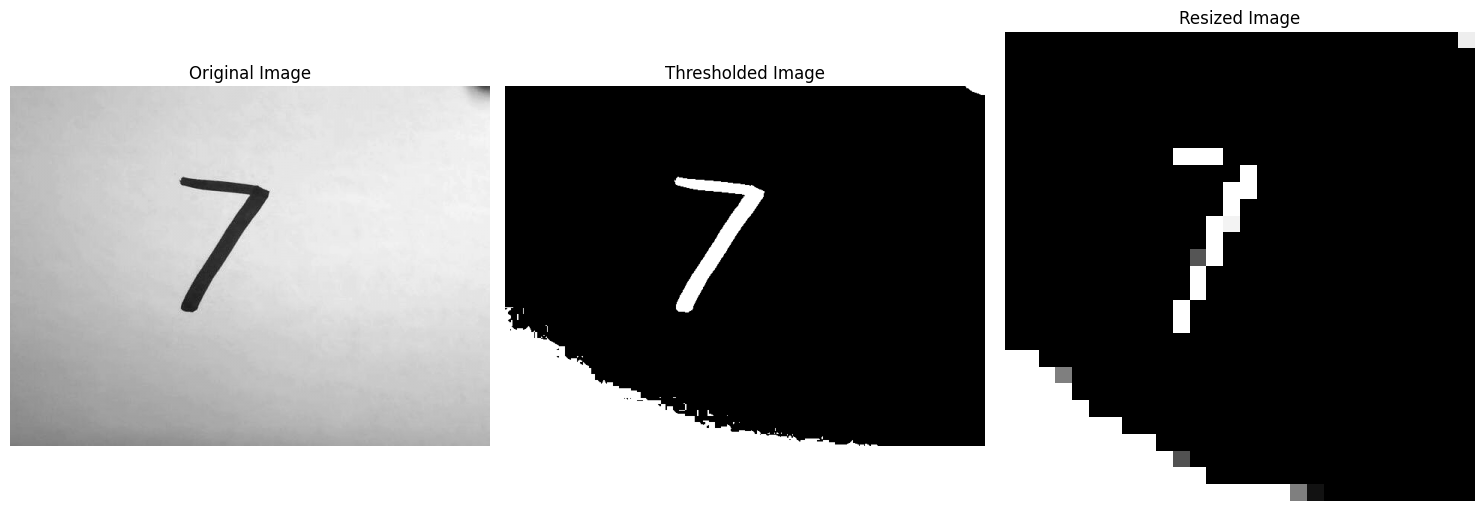

In [100]:
resized = process_image('photo.jpg')

In [101]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")
from google.colab.patches import cv2_imshow
cv2_imshow(resized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.99999
  8   |   0.00000
  9   |   0.00000
The predicted digit is: 7


In [102]:
take_photo_2()

<IPython.core.display.Javascript object>

'photo.jpg'

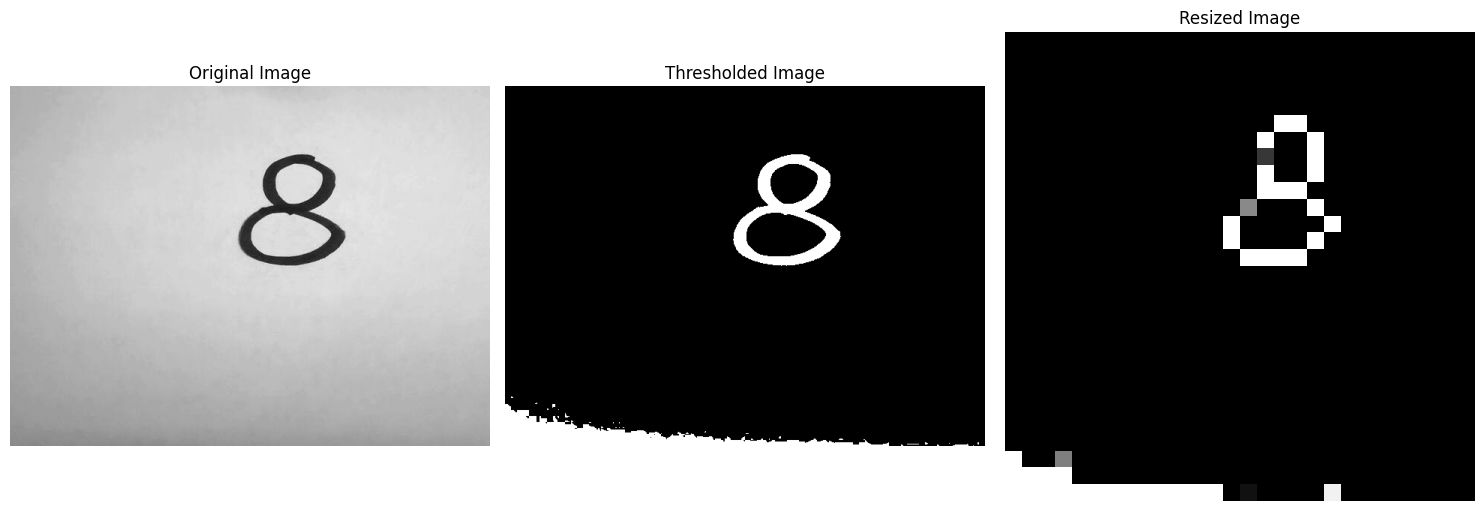

In [103]:
resized = process_image('photo.jpg')

In [104]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")
from google.colab.patches import cv2_imshow
cv2_imshow(resized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00002
  2   |   0.00223
  3   |   0.01173
  4   |   0.00475
  5   |   0.00001
  6   |   0.00000
  7   |   0.53548
  8   |   0.00021
  9   |   0.44556
The predicted digit is: 7


In [105]:
take_photo_2()

<IPython.core.display.Javascript object>

'photo.jpg'

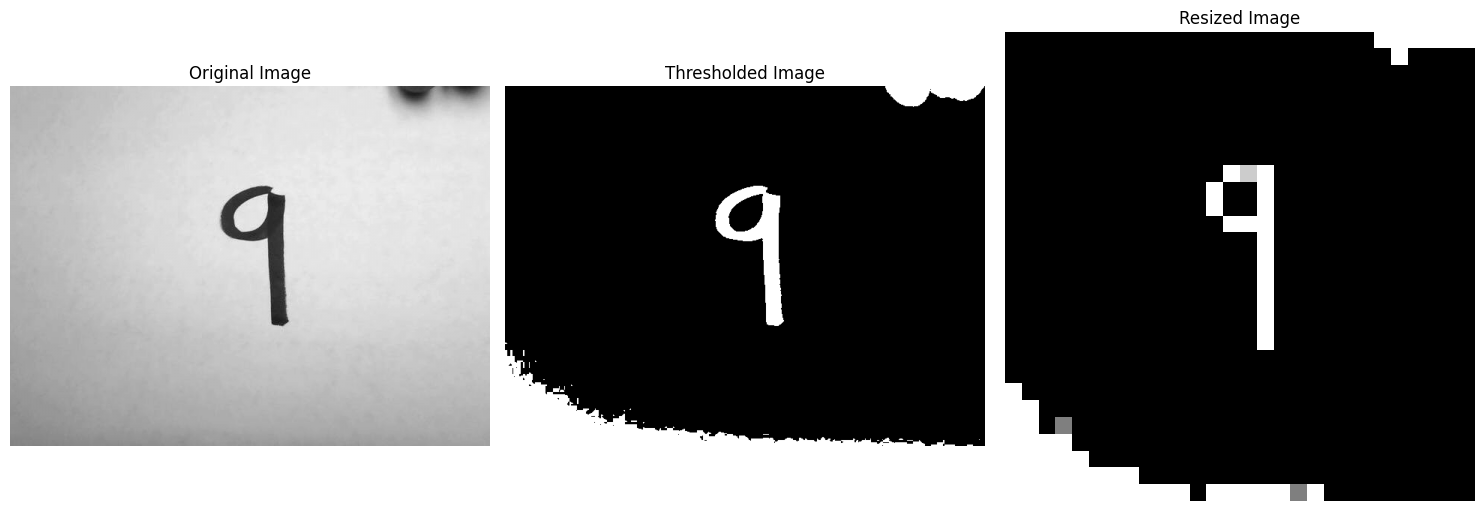

In [106]:
resized = process_image('photo.jpg')

In [107]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")
from google.colab.patches import cv2_imshow
cv2_imshow(resized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   1.00000
  8   |   0.00000
  9   |   0.00000
The predicted digit is: 7


Se puede observar en todos los resultados que en su mayoria la prediccion es un numero 7 que en este caso solo es correcta en el numero 7. Por lo tanto hare algunos cambios en el modelo y en el procesamiento de imagenes.

Primero generare un nuevo modelo con un menor numero de capas ocultas, y con menos neuronas, cambiare el early_stop a que se pare con val_accuracy en lugar de val_loss como se hizo anteriormente, y modifique el parametro de patience de 5 a 8.

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model2 = Sequential()
# Primera Capa, tamaño de imagen de entrada.
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,946 (429.48 KB)

 Trainable params: 109,946 (429.48 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights = True)


In [117]:
history = model2.fit(train_images,
                    train_labels,
                    epochs=50,
                    validation_split = 0.5,
                    batch_size = 32,
                    callbacks = [early_stop])

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4485 - loss: 4.7970 - val_accuracy: 0.6765 - val_loss: 0.9827
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7227 - loss: 0.9052 - val_accuracy: 0.8341 - val_loss: 0.6989
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8633 - loss: 0.5891 - val_accuracy: 0.9016 - val_loss: 0.4922
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9103 - loss: 0.3847 - val_accuracy: 0.9219 - val_loss: 0.4065
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9320 - loss: 0.2934 - val_accuracy: 0.9340 - val_loss: 0.3296
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9445 - loss: 0.2372 - val_accuracy: 0.9376 - val_loss: 0.2901
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9505 - loss: 0.1943 - val_accuracy: 0.9438 - val_loss: 0.2747
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9558 - loss: 0.1802 - val_accuracy: 0.

El modelo se detuvo en la epoca numero 41, sin embargo el mejor val_accuracy estuvo en la epoca 33, que tuvo un valor de 0.9662 y un val_loss de 0.2343 Comparando con el modelo anterior el valor de accuracy que se tenia era de
0.964 pero un valor de val_loss de 0.143

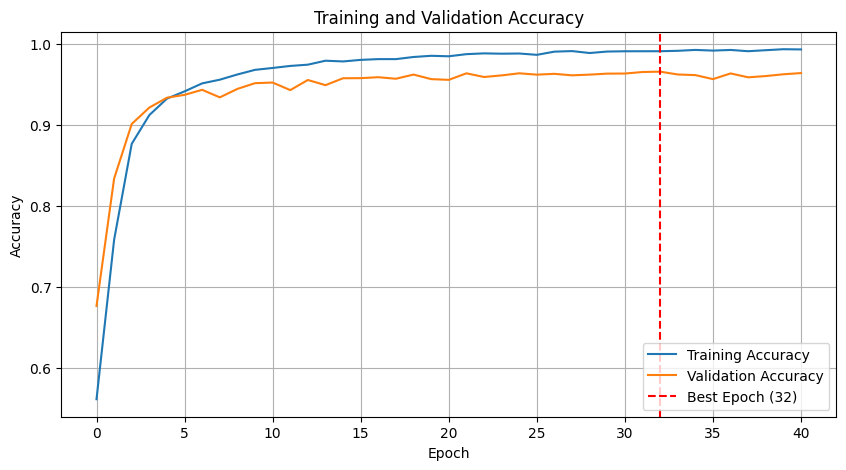

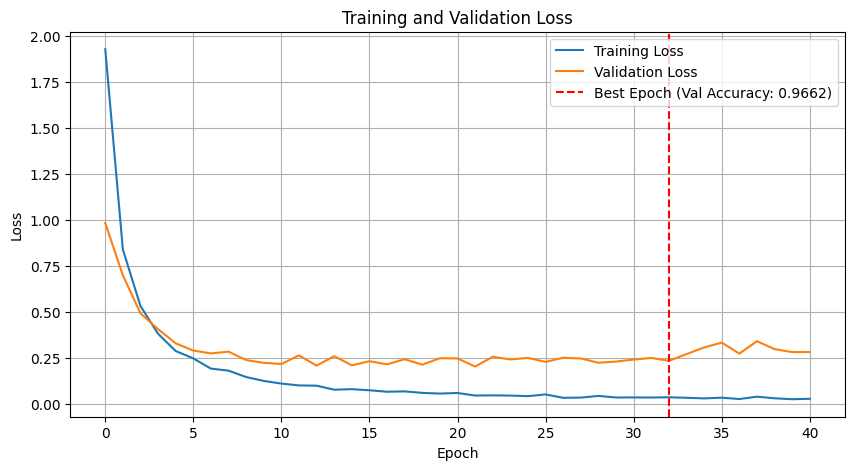

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de que el historial tiene datos válidos
accuracy_list = history.history['accuracy']
val_accuracy_list = history.history['val_accuracy']
loss_list = history.history['loss']
val_loss_list = history.history['val_loss']

# Encontrar el índice (época) donde la val_accuracy fue máxima
best_epoch = np.argmax(val_accuracy_list)
best_val_accuracy = val_accuracy_list[best_epoch]

plt.figure(figsize=(10, 5))
plt.plot(accuracy_list, label='Training Accuracy')
plt.plot(val_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Epoch ({best_epoch})')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Graficar la pérdida
plt.figure(figsize=(10, 5))
plt.plot(loss_list, label='Training Loss')
plt.plot(val_loss_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Línea vertical en la mejor época (basada en la precisión de validación)
plt.axvline(x=best_epoch, color='r', linestyle='--',
            label=f'Best Epoch (Val Accuracy: {best_val_accuracy:.4f})')

plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [168]:
def process_image_2(image_path):
    """
    Carga una imagen, le aplica un umbral, la redimensiona a 28x28 píxeles
    y muestra las imágenes original, con umbral y redimensionada.

    Args:
        image_path (str): La ruta al archivo de la imagen.
    """
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Thresholding
    thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 27, 2) # Ejemplo de parámetros

    kernel = np.ones((4, 4), np.uint8) # Prueba con diferentes tamaños

    # Aplicar la operación de apertura
    cleaned_thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

    # Ahora 'cleaned_thresh' debería tener menos puntos blancos en el fondo
    resized = cv2.resize(cleaned_thresh, (28, 28))
    # Resize the image to 28x28 pixels
    #resized = cv2.resize(thresh, (28, 28))

    # Display the images side by side
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    # Original Image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    # Thresholded Image
    axes[1].imshow(thresh, cmap='gray')
    axes[1].set_title('Thresholded Image')
    axes[1].axis('off')
    # Resized Image
    axes[2].imshow(resized, cmap='gray')
    axes[2].set_title('Resized Image')
    axes[2].axis('off')
    plt.tight_layout()
    plt.show()
    return resized

In [175]:
take_photo_2()

<IPython.core.display.Javascript object>

'photo.jpg'

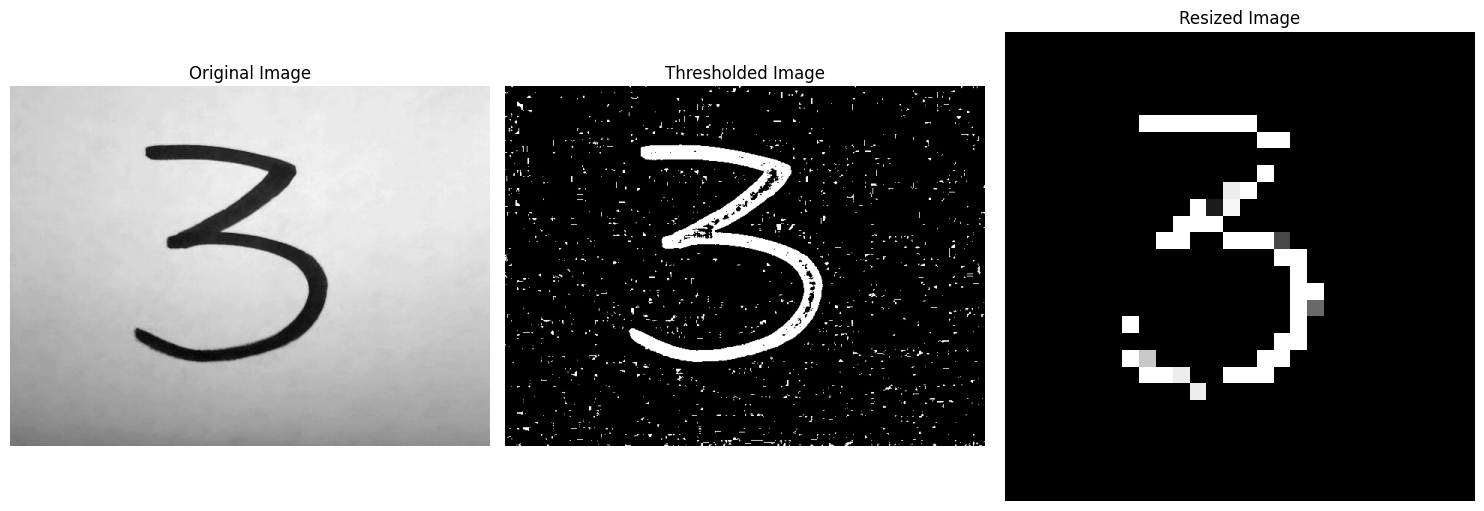

In [176]:
resized = process_image_2('photo.jpg')

In [177]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model2.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")
from google.colab.patches import cv2_imshow
cv2_imshow(resized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00000
  2   |   0.00000
  3   |   0.99996
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.00000
  8   |   0.00004
  9   |   0.00000
The predicted digit is: 3


In [172]:
take_photo_2()

<IPython.core.display.Javascript object>

'photo.jpg'

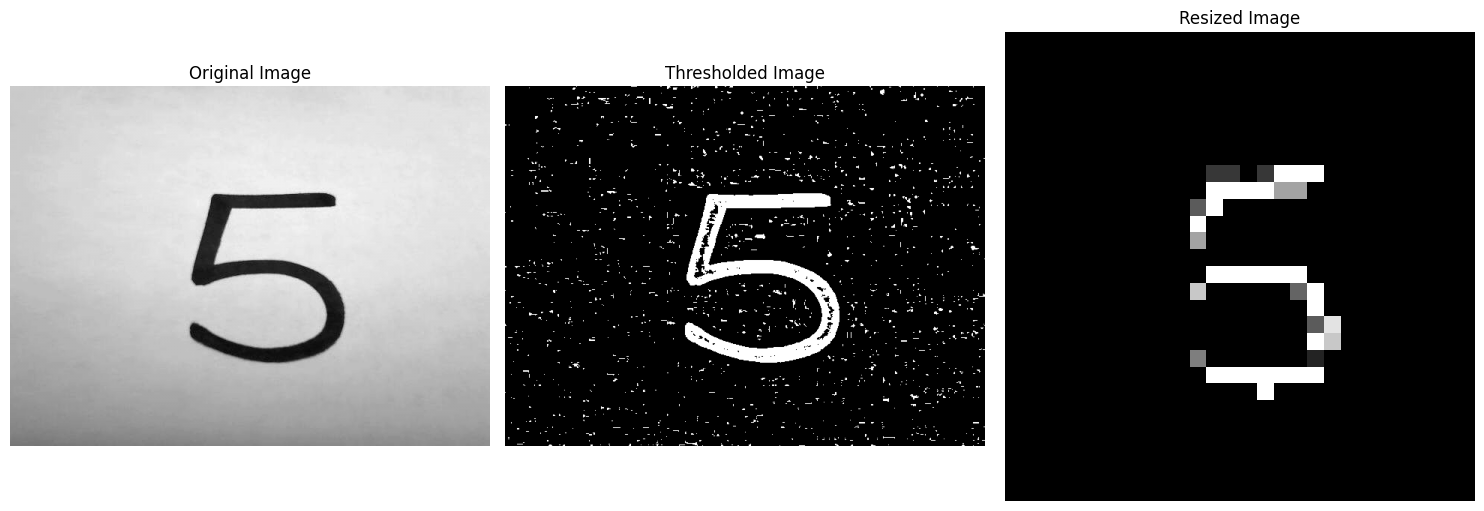

In [173]:
resized = process_image_2('photo.jpg')

In [174]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model2.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")
from google.colab.patches import cv2_imshow
cv2_imshow(resized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Digit | Probability
-------------------
  0   |   0.00001
  1   |   0.00236
  2   |   0.00000
  3   |   0.00806
  4   |   0.00000
  5   |   0.98938
  6   |   0.00005
  7   |   0.00001
  8   |   0.00001
  9   |   0.00013
The predicted digit is: 5


In [166]:
take_photo_2()

<IPython.core.display.Javascript object>

'photo.jpg'

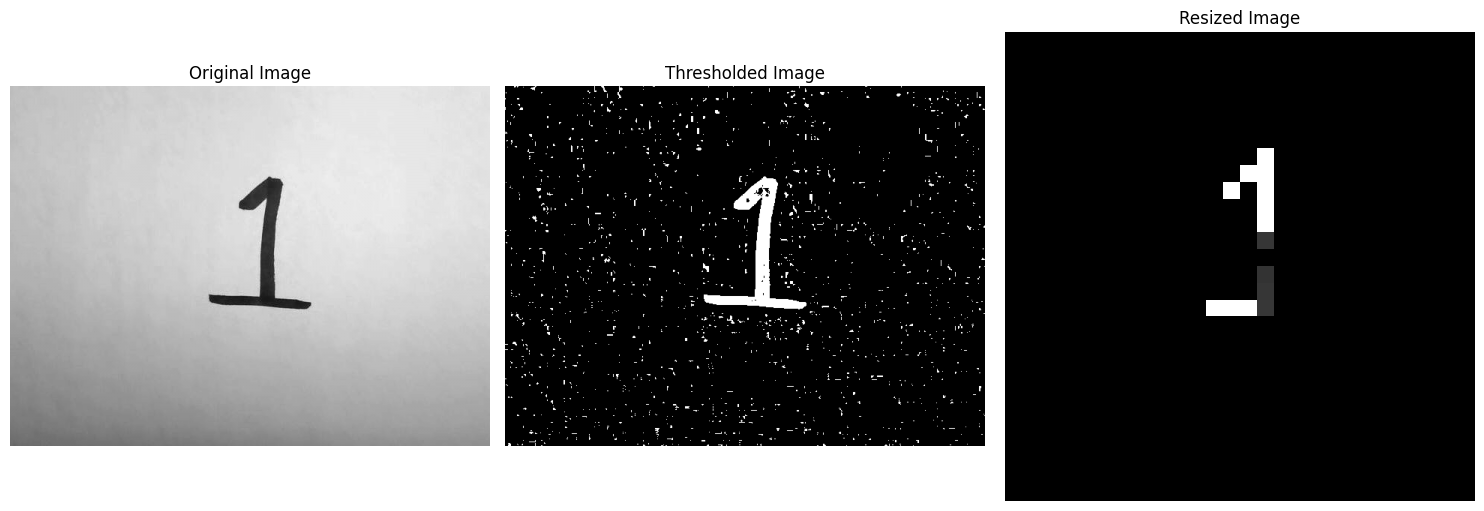

In [169]:
resized = process_image_2('photo.jpg')

In [170]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model2.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")
from google.colab.patches import cv2_imshow
cv2_imshow(resized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.99999
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.00001
  8   |   0.00000
  9   |   0.00000
The predicted digit is: 1


In [178]:
take_photo_2()

<IPython.core.display.Javascript object>

'photo.jpg'

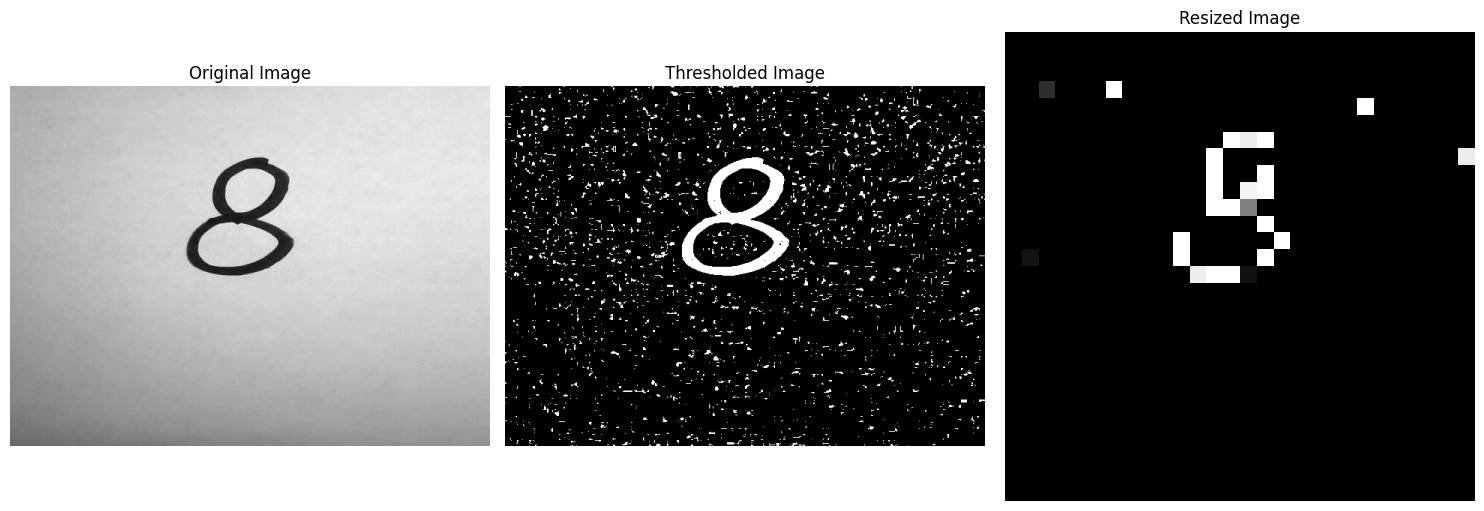

In [179]:
resized = process_image_2('photo.jpg')

In [180]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model2.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")
from google.colab.patches import cv2_imshow
cv2_imshow(resized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   0.00049
  2   |   0.00000
  3   |   0.00002
  4   |   0.00004
  5   |   0.06562
  6   |   0.00000
  7   |   0.00055
  8   |   0.00000
  9   |   0.93327
The predicted digit is: 9


In [184]:
take_photo_2()

<IPython.core.display.Javascript object>

'photo.jpg'

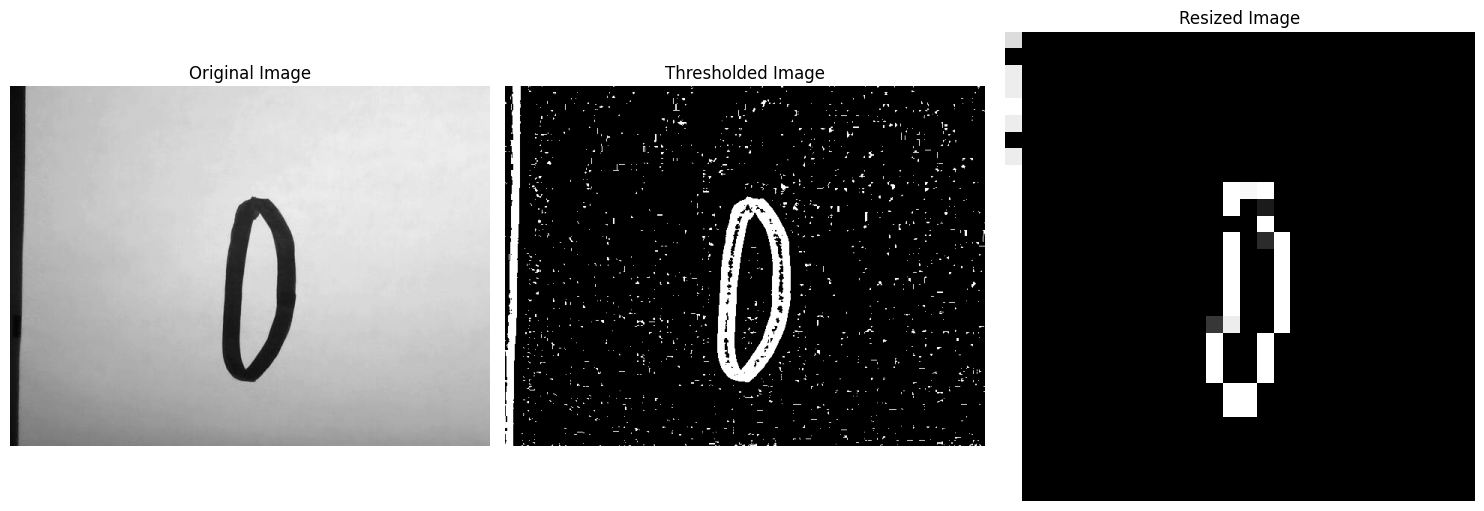

In [185]:
resized = process_image_2('photo.jpg')

In [186]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model2.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")
from google.colab.patches import cv2_imshow
cv2_imshow(resized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Digit | Probability
-------------------
  0   |   0.00131
  1   |   0.00148
  2   |   0.00032
  3   |   0.00087
  4   |   0.00032
  5   |   0.01243
  6   |   0.97884
  7   |   0.00050
  8   |   0.00298
  9   |   0.00096
The predicted digit is: 6


In [187]:
take_photo_2()

<IPython.core.display.Javascript object>

'photo.jpg'

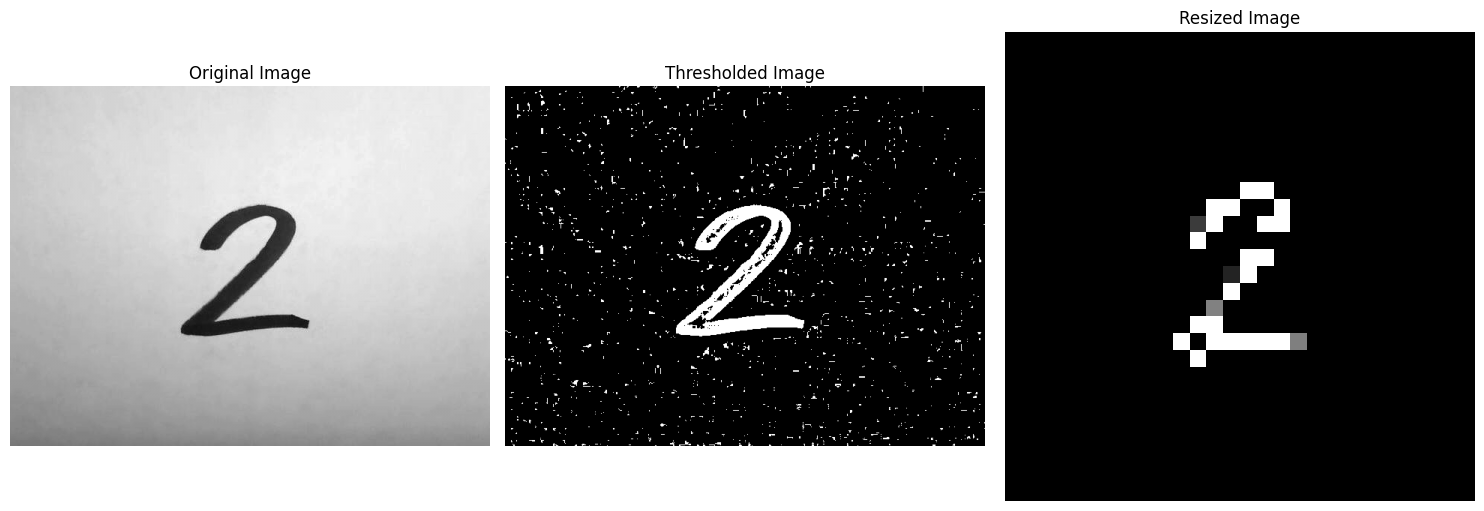

In [188]:
resized = process_image_2('photo.jpg')

In [189]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model2.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")
from google.colab.patches import cv2_imshow
cv2_imshow(resized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Digit | Probability
-------------------
  0   |   0.00011
  1   |   0.03333
  2   |   0.91742
  3   |   0.00009
  4   |   0.00068
  5   |   0.00000
  6   |   0.00055
  7   |   0.04775
  8   |   0.00005
  9   |   0.00001
The predicted digit is: 2


In [190]:
take_photo_2()

<IPython.core.display.Javascript object>

'photo.jpg'

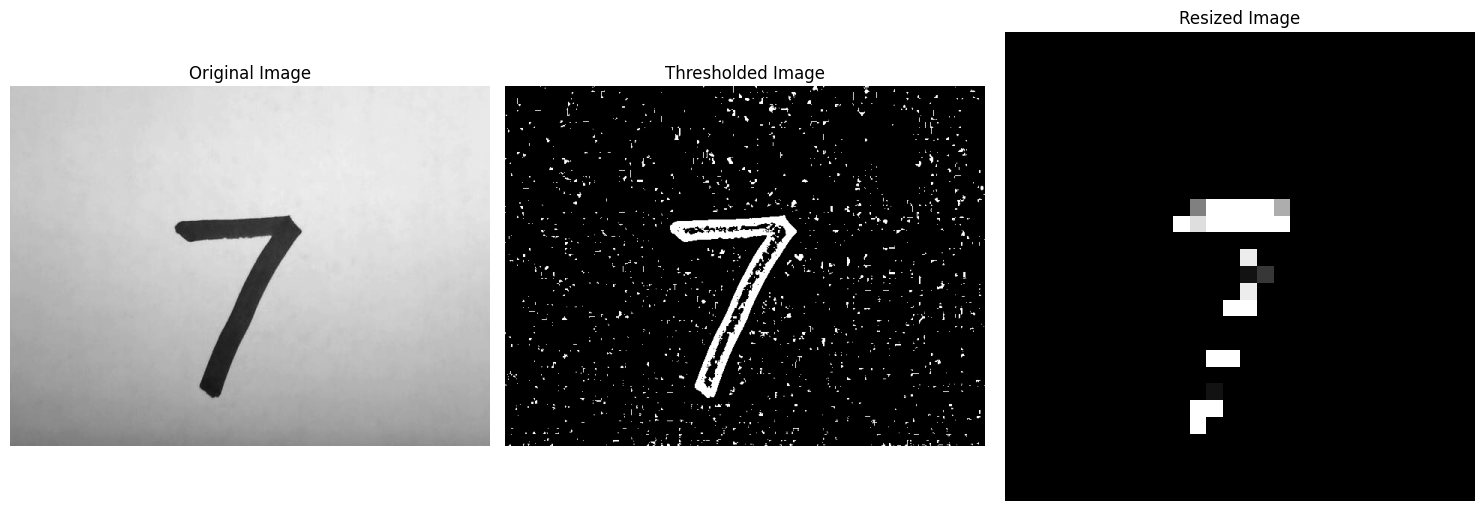

In [191]:
resized = process_image_2('photo.jpg')

In [192]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model2.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")
from google.colab.patches import cv2_imshow
cv2_imshow(resized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Digit | Probability
-------------------
  0   |   0.00000
  1   |   1.00000
  2   |   0.00000
  3   |   0.00000
  4   |   0.00000
  5   |   0.00000
  6   |   0.00000
  7   |   0.00000
  8   |   0.00000
  9   |   0.00000
The predicted digit is: 1


In [193]:
take_photo_2()

<IPython.core.display.Javascript object>

'photo.jpg'

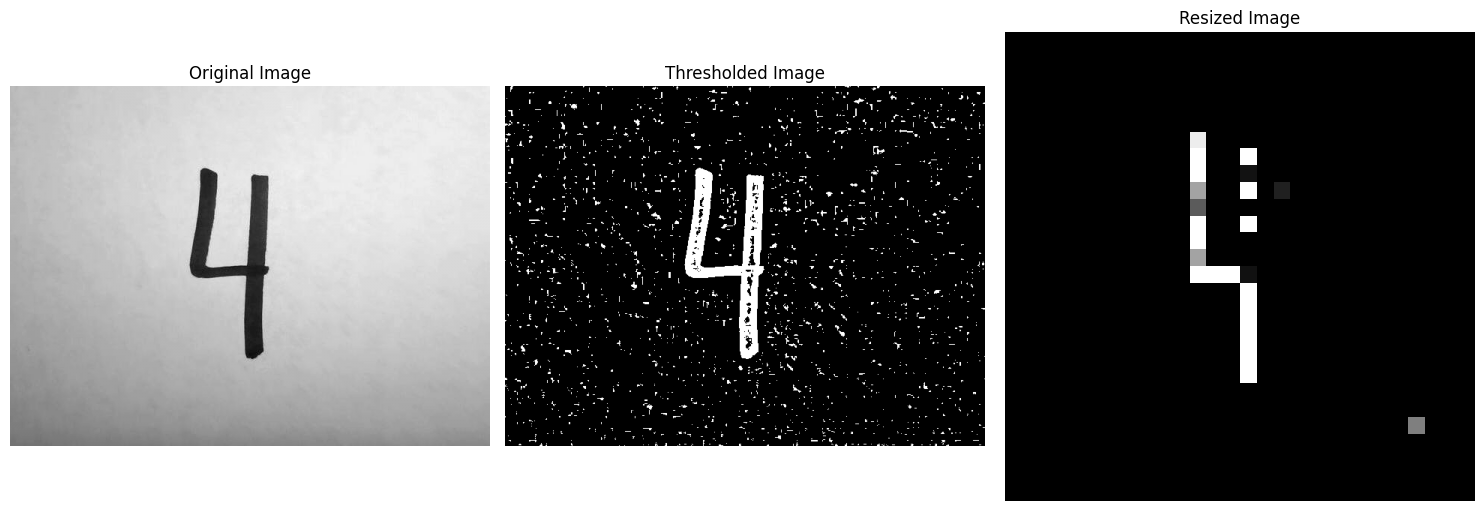

In [194]:
resized = process_image_2('photo.jpg')

In [195]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model2.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")
from google.colab.patches import cv2_imshow
cv2_imshow(resized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Digit | Probability
-------------------
  0   |   0.00032
  1   |   0.95453
  2   |   0.00035
  3   |   0.00025
  4   |   0.02834
  5   |   0.00032
  6   |   0.00080
  7   |   0.00473
  8   |   0.00169
  9   |   0.00867
The predicted digit is: 1


In [196]:
take_photo_2()

<IPython.core.display.Javascript object>

'photo.jpg'

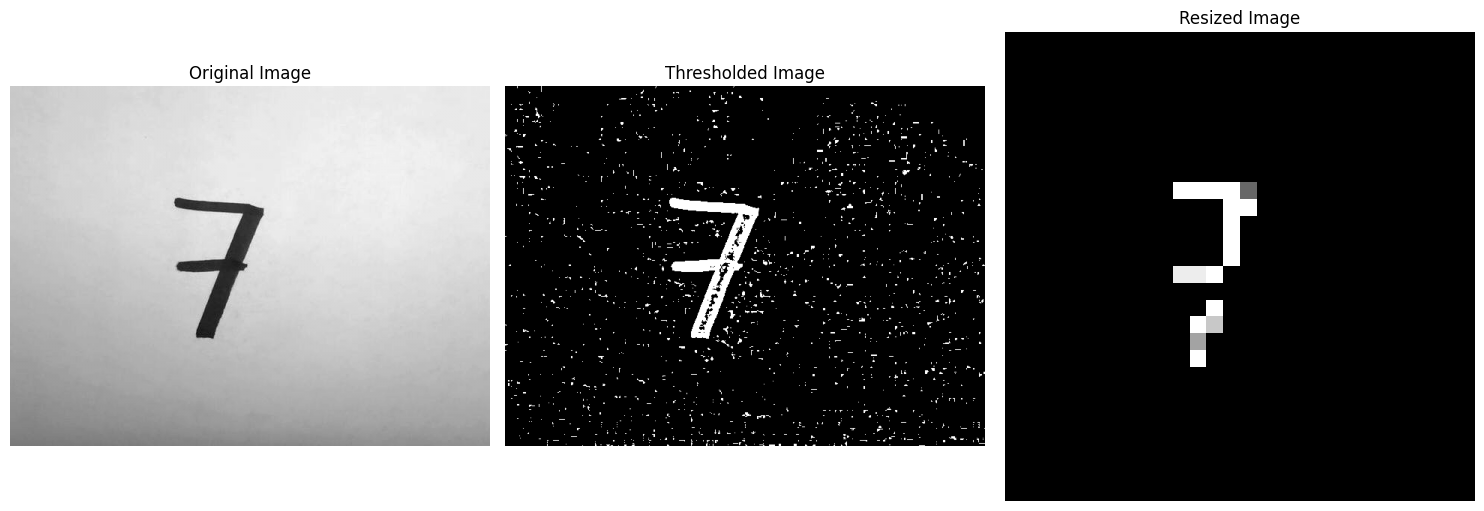

In [197]:
resized = process_image_2('photo.jpg')

In [198]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model2.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")
from google.colab.patches import cv2_imshow
cv2_imshow(resized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Digit | Probability
-------------------
  0   |   0.00003
  1   |   0.99398
  2   |   0.00164
  3   |   0.00006
  4   |   0.00329
  5   |   0.00002
  6   |   0.00000
  7   |   0.00043
  8   |   0.00000
  9   |   0.00054
The predicted digit is: 1


In [199]:
take_photo_2()

<IPython.core.display.Javascript object>

'photo.jpg'

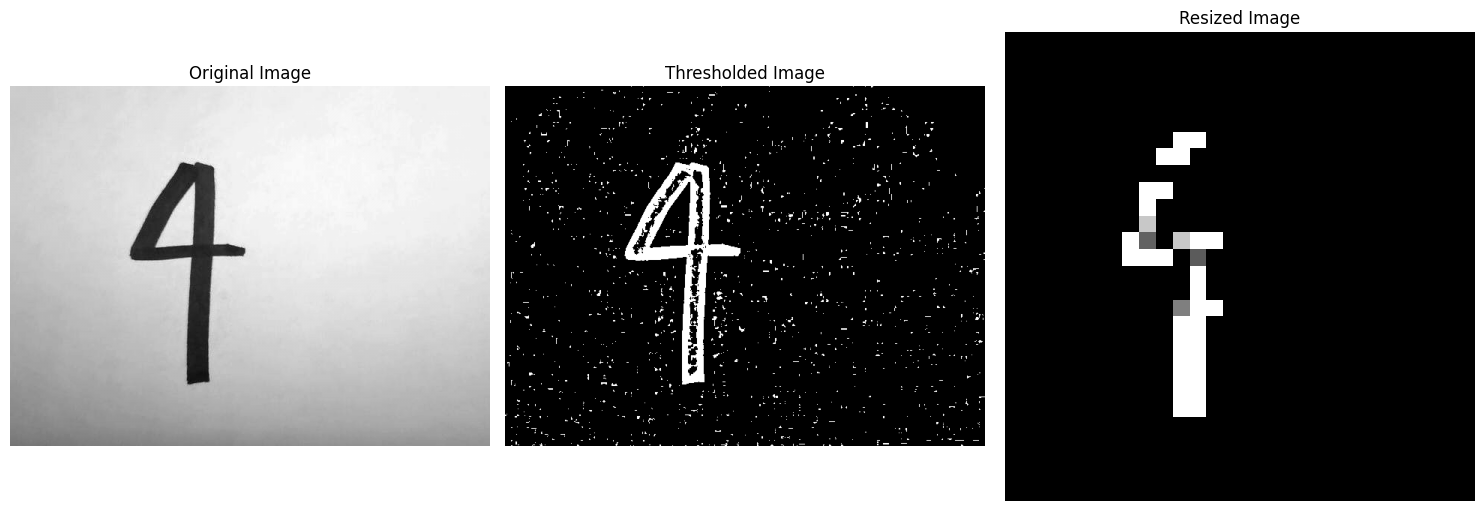

In [200]:
resized = process_image_2('photo.jpg')

In [201]:
# Reshape the image for model compatibility (batch size, height, width, channels)
input_image = resized.reshape(1, 28, 28, 1)
# Use the mode's predict method
prediction = model2.predict(input_image)
predicted_label = np.argmax(prediction)
# Display the result
print("Digit | Probability")
print("-------------------")
for i, prob in enumerate(prediction[0]):
    print(f"  {i}   |   {prob:.5f}")
print(f"The predicted digit is: {predicted_label}")
from google.colab.patches import cv2_imshow
cv2_imshow(resized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Digit | Probability
-------------------
  0   |   0.00089
  1   |   0.00034
  2   |   0.00078
  3   |   0.00016
  4   |   0.00135
  5   |   0.00141
  6   |   0.99115
  7   |   0.00048
  8   |   0.00292
  9   |   0.00052
The predicted digit is: 6


In [202]:
model.save('model2.h5')